In [14]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm

In [15]:
imagesdf = [cv2.imread(file) for file in tqdm(glob.glob("../data/imagenes/*.jpg"))]

100%|███████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 160.00it/s]


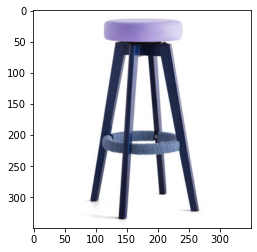

In [29]:
img_new = imagesdf[3]
plt.imshow(img_new)

In [30]:
img = img_new
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

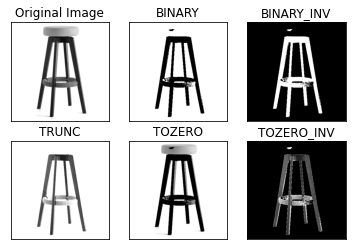

In [31]:
ret,thresh1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img,127,255,cv2.THRESH_TRUNC)
ret,thresh4 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO)
ret,thresh5 = cv2.threshold(img,127,255,cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])

plt.show()

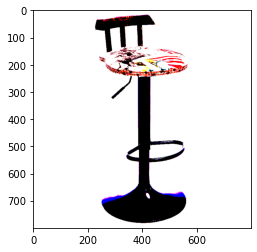

In [19]:
plt.imshow(thresh1)

In [20]:
SIZE = 100
newImg = cv2.resize(thresh1, (SIZE, SIZE))

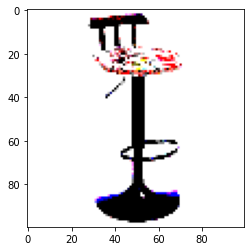

In [21]:
plt.imshow(newImg)

In [22]:
newImg.shape

(100, 100, 3)

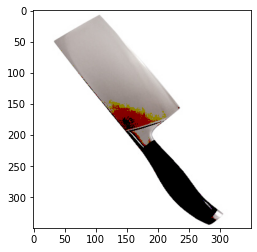

In [15]:
img_test = images[4]
plt.imshow(img_test)

In [16]:
gray = cv2.cvtColor(img_test, cv2.COLOR_BGR2GRAY)

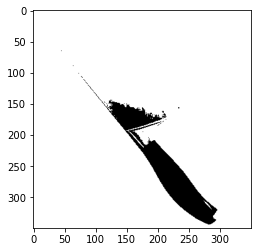

In [17]:
thr, imgB = cv2.threshold(gray, 150, 255, cv2.THRESH_OTSU) 
plt.imshow(imgB, cmap='gray')

SIZE = 60
newImg = cv2.resize(img_test, (SIZE, SIZE))
plt.imshow(newImg)

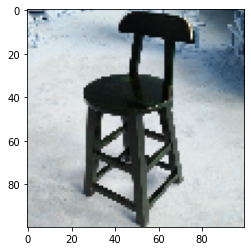

In [4]:
SIZE = 100
newImg = cv2.resize(img_test, (SIZE, SIZE))
plt.imshow(newImg)

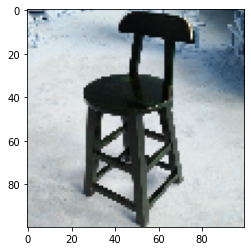

In [5]:
SIZE = 100
newImg = cv2.resize(newImg, (SIZE, SIZE))
plt.imshow(newImg)

## LPF

Promedio

In [6]:
l = 3
d = l*l
kernel = np.ones((l,l),np.float32)/d
dst = cv2.filter2D(newImg,-1,kernel)

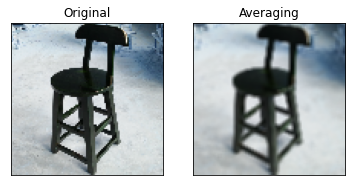

In [7]:
plt.subplot(121),plt.imshow(newImg),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

Gaussian Filtering

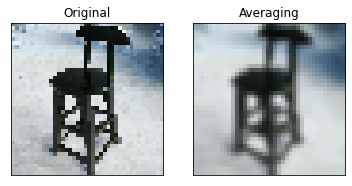

In [8]:
blur = cv2.GaussianBlur(newImg,(3,3),0)
plt.subplot(121),plt.imshow(newImg),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

median  

In [9]:
median = cv2.medianBlur(newImg,5)

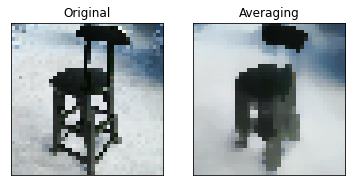

In [10]:
plt.subplot(121),plt.imshow(newImg),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

Bilateral Filtering

In [8]:
blur = cv2.bilateralFilter(dst,9,75,75)

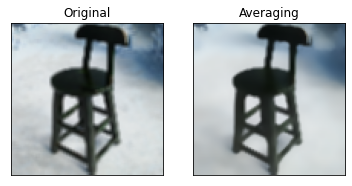

In [9]:
plt.subplot(121),plt.imshow(dst),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

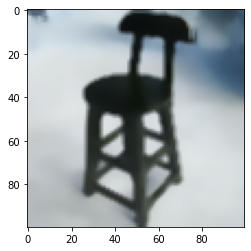

In [10]:
plt.imshow(blur)

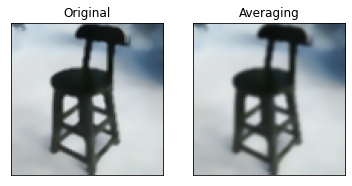

In [11]:
blur2 = cv2.GaussianBlur(blur,(3,3),0)
plt.subplot(121),plt.imshow(blur),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur2),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

## HPF

## Transformaciones morfológicas

Erosion

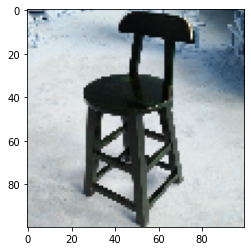

In [15]:
SIZE = 100
newImg = cv2.resize(img_test, (SIZE, SIZE))
plt.imshow(newImg)

In [16]:
kernel = np.ones((5,5),np.uint8)
erosion = cv2.erode(newImg,kernel,iterations = 1)


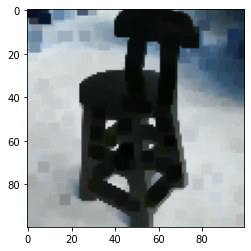

In [17]:
plt.imshow(erosion)

### Extracción interactiva de primer plano mediante el algoritmo GrabCut

In [104]:
img = images[2]

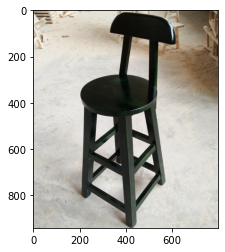

In [105]:
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

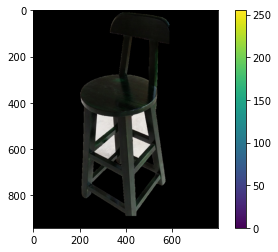

(<matplotlib.image.AxesImage at 0x2b1483c32b0>,
 None)

In [106]:
#img = cv2.imread('messi5.jpg')
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (190,10,400,880)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

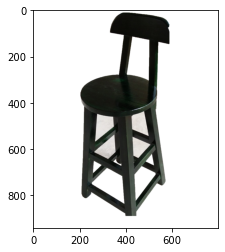

In [107]:
img[np.where((img == [0,0,0]).all(axis=2))]=[255,255,255]
plt.imshow(img)

In [77]:
hist = cv2.calcHist([img],[0],None,[256],[0,256])

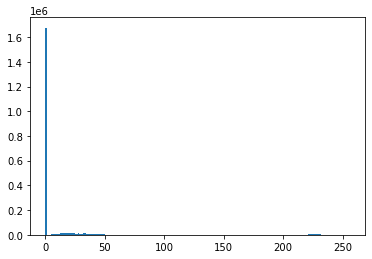

In [78]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

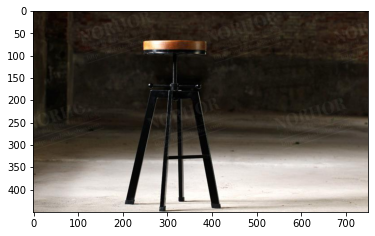

In [79]:
img = images[3]
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

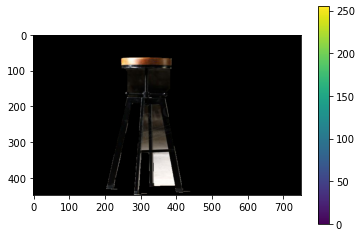

(<matplotlib.image.AxesImage at 0x2b14cac8400>,
 None)

In [80]:
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (200,60,450,500)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

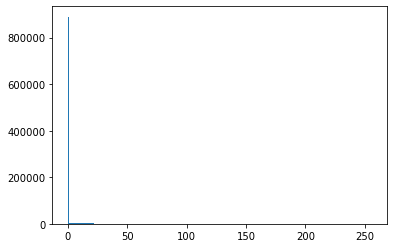

In [81]:
plt.hist(img.ravel(),256,[0,256]); plt.show()

In [82]:
img[np.where((img == [0,0,0]).all(axis=2))]=[255,255,255]

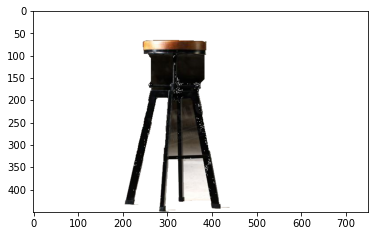

In [83]:
plt.imshow(img)

# 2

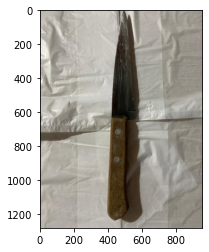

In [96]:
img = images[11]
img= cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)

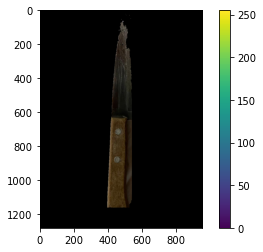

(<matplotlib.image.AxesImage at 0x2b14c7db6a0>,
 None)

In [102]:
mask = np.zeros(img.shape[:2],np.uint8)

bgdModel = np.zeros((1,65),np.float64)
fgdModel = np.zeros((1,65),np.float64)

rect = (390,10,150,1300)
cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]

plt.imshow(img),plt.colorbar(),plt.show()

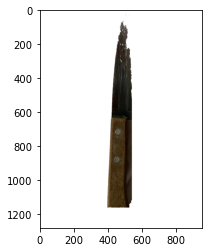

In [103]:
img[np.where((img == [0,0,0]).all(axis=2))]=[255,255,255]
plt.imshow(img)